In [4]:
# from psaw import PushshiftAPI 
# import datetime as dt 
# import pandas as pd 
# import matplotlib.pyplot as plt
# subreddit = 'conspiracy' 
# start_date = int(dt.datetime(2022, 1, 1).timestamp()) 
# end_date = int(dt.datetime(2022, 3, 31).timestamp())
# api = PushshiftAPI() 
# submissions = list(api.search_submissions(after=start_date, before=end_date, subreddit=subreddit))
# df = pd.DataFrame([vars(sub) for sub in submissions]) 
# df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s') 
# df['date'] = df['created_utc'].dt.date
# grouped = df.groupby('date')['id'].count() 
# grouped.plot(kind='line', figsize=(10,5)) 
# plt.title(f'Daily Submissions to r/{subreddit}') 
# plt.xlabel('Date') 
# plt.ylabel('Number of Submissions') 
# plt.show()


# from psaw import PushshiftAPI 
# api = PushshiftAPI() 
# print(api)

KeyboardInterrupt: 

In [5]:
import datetime as dt 
start_date = int(dt.datetime(2023, 2, 3).timestamp()) 
end_date = int(dt.datetime(2022, 3, 31).timestamp())

print(start_date, end_date)

1675400400 1648699200


In [13]:
#pull data from Reddit API



import requests
import pandas as pd
import time
import datetime as dt
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#set up the url 
url = 'https://api.pushshift.io/reddit/search/submission'

#set up the parameters
# collect from r/conspiracy subreddit
# collect 100 posts at a time
# collect posts from 3 February 2023 to April 2023
# retrive only data contain keywords "ohio"

params = {
    'subreddit': 'conspiracy',
    'size': 1000,
    'after': start_date,
    'q': 'ohio'
}
#pull the data
res = requests.get(url, params)
#check the status code
res.status_code

#convert the data to a json file
data = res.json()
#check the data
data


{'data': [{'subreddit': 'conspiracy',
   'selftext': '',
   'author_fullname': 't2_lh10xit',
   'gilded': 0,
   'title': 'CDC team studying health impacts of Ohio train derailment fell ill during investigation',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/conspiracy',
   'hidden': False,
   'pwls': None,
   'link_flair_css_class': None,
   'thumbnail_height': 105,
   'top_awarded_type': None,
   'hide_score': True,
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'upvote_ratio': 1.0,
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'total_awards_received': 0,
   'media_embed': {},
   'thumbnail_width': 140,
   'author_flair_template_id': None,
   'is_original_content': False,
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text': None,
   'score': 1,
   'is_created_from_ads_ui': False,
   'author_premium': False,
   'thumbnail': 

In [14]:
# convert the data to a dataframe  
df = pd.DataFrame(data['data'])
#check the dataframe
df.head()

subreddit                                           selftext  \
0  conspiracy                                                      
1  conspiracy                                                      
2  conspiracy  There are many counties across the US ditching...   
3  conspiracy                                                      
4  conspiracy   \n\n**Could this be a foreign power doing thi...   

  author_fullname  gilded                                              title  \
0      t2_lh10xit       0  CDC team studying health impacts of Ohio train...   
1     t2_3x6ne7f9       0  Ohio man charged for using Molotov cocktails t...   
2        t2_spw4p       0  Say what you want about Trump, his efforts to ...   
3        t2_5aoi2       0  Hours of Ohio train derailment footage lost af...   
4     t2_4516sa4q       0  Could this be a foreign power doing this to th...   

  link_flair_richtext subreddit_name_prefixed  hidden  pwls  \
0                  []            r/conspiracy   False   NaN   
1                  []            r/conspiracy   False   NaN   
2                  []            r/conspiracy   False   NaN   
3                  []            r/conspiracy   False   NaN   
4                  []            r/conspiracy   False   NaN   

  link_flair_css_class  ...  media is_video  retrieved_utc  updated_utc  \
0                 None  ...   None    False     1680551002   1680551003   
1                 None  ...   None    False     1680354219   1680354219   
2                 None  ...   None    False     1680295839   1680295840   
3                 None  ...   None    False     1680199636   1680199637   
4                 None  ...   None    False     1680191291   1680191292   

      utc_datetime_str  media_metadata is_gallery gallery_data  edited_on  \
0  2023-04-03 19:43:09             NaN        NaN          NaN        NaN   
1  2023-04-01 13:03:27             NaN        NaN          NaN        NaN   
2  2023-03-31 20:50:23             NaN        NaN          NaN        NaN   
3  2023-03-30 18:06:58             NaN        NaN          NaN        NaN   
4  2023-03-30 15:47:53             NaN        NaN          NaN        NaN   

  author_cakeday  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 94 columns]

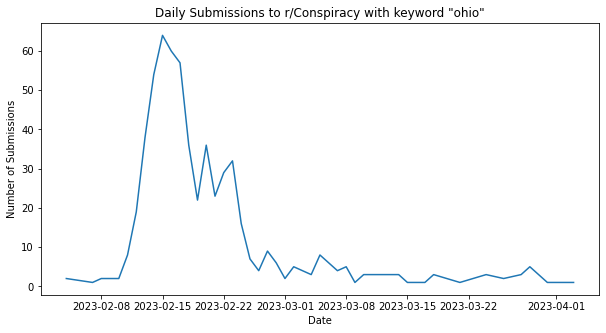

In [17]:
# create visualization of post per day
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['created_utc'].dt.date
grouped = df.groupby('date')['id'].count()
grouped.plot(kind='line', figsize=(10,5))
plt.title(f'Daily Submissions to r/Conspiracy with keyword "ohio"')
plt.xlabel('Date')
plt.ylabel('Number of Submissions')
plt.show()


## data collection run 2


In [22]:
#set up the url 
url = 'https://api.pushshift.io/reddit/search/submission'

#set up the parameters
# collect from r/conspiracy subreddit
# collect 100 posts at a time
# collect posts from 3 February 2023 to April 2023
# retrive only data contain keywords "ohio"

params = {
    'subreddit': 'conspiracy',
    'size': 1000,
    'after': start_date,
    'q': 'train'
}
#pull the data
res = requests.get(url, params)
#check the status code
res.status_code

#convert the data to a json file
data = res.json()
#check the data
data


{'data': [{'subreddit': 'conspiracy',
   'selftext': '',
   'author_fullname': 't2_k4kids6r',
   'gilded': 0,
   'title': 'Is it time for the daily train detailment yet, or did I miss it, and have to wait until tomorrow?',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/conspiracy',
   'hidden': False,
   'pwls': None,
   'link_flair_css_class': None,
   'thumbnail_height': None,
   'top_awarded_type': None,
   'hide_score': True,
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'upvote_ratio': 1.0,
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'total_awards_received': 0,
   'media_embed': {},
   'thumbnail_width': None,
   'author_flair_template_id': None,
   'is_original_content': False,
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text': None,
   'score': 1,
   'is_created_from_ads_ui': False,
   'author_premium': False,
   

In [23]:
df = pd.DataFrame(data['data'])
#check the dataframe
df.head()

subreddit selftext author_fullname  gilded  \
0  conspiracy              t2_k4kids6r       0   
1  conspiracy               t2_lh10xit       0   
2  conspiracy               t2_lh10xit       0   
3  conspiracy              t2_vgs0z0jm       0   
4  conspiracy               t2_lh10xit       0   

                                               title link_flair_richtext  \
0  Is it time for the daily train detailment yet,...                  []   
1  CDC team studying health impacts of Ohio train...                  []   
2                    25 train cars derail in Montana                  []   
3              Train Derailment in Montana Yesterday                  []   
4  Homes evacuated after train carrying ethanol d...                  []   

  subreddit_name_prefixed  hidden  pwls link_flair_css_class  ...  \
0            r/conspiracy   False   NaN                 None  ...   
1            r/conspiracy   False   NaN                 None  ...   
2            r/conspiracy   False   NaN                 None  ...   
3            r/conspiracy   False   NaN                 None  ...   
4            r/conspiracy   False   NaN                 None  ...   

   updated_utc     utc_datetime_str  post_hint  \
0   1680557297  2023-04-03 21:28:02        NaN   
1   1680551003  2023-04-03 19:43:09       link   
2   1680547648  2023-04-03 18:47:18       link   
3   1680530209  2023-04-03 13:56:34      image   
4   1680242003  2023-03-31 05:53:11       link   

                              url_overridden_by_dest  \
0                                                NaN   
1                           https://archive.is/x84NT   
2  https://abcnews.go.com/Business/wireStory/25-t...   
3                https://i.redd.it/8j32xiq2vpra1.jpg   
4                           https://archive.is/d3j4S   

                                             preview  media_metadata  \
0                                                NaN             NaN   
1  {'images': [{'source': {'url': 'https://extern...             NaN   
2  {'images': [{'source': {'url': 'https://extern...             NaN   
3  {'images': [{'source': {'url': 'https://previe...             NaN   
4  {'images': [{'source': {'url': 'https://extern...             NaN   

  edited_on is_gallery  gallery_data author_cakeday  
0       NaN        NaN           NaN            NaN  
1       NaN        NaN           NaN            NaN  
2       NaN        NaN           NaN            NaN  
3       NaN        NaN           NaN            NaN  
4       NaN        NaN           NaN            NaN  

[5 rows x 94 columns]

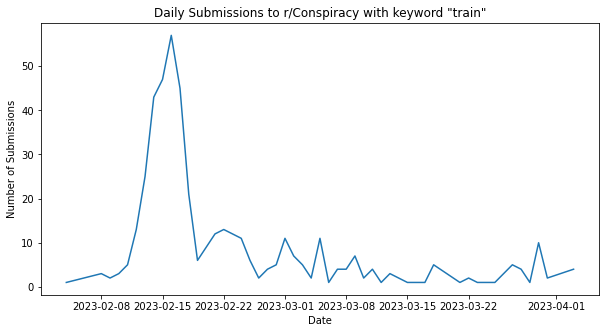

In [24]:
# create visualization of post per day
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['created_utc'].dt.date
grouped = df.groupby('date')['id'].count()
grouped.plot(kind='line', figsize=(10,5))
plt.title(f'Daily Submissions to r/Conspiracy with keyword "train"')
plt.xlabel('Date')
plt.ylabel('Number of Submissions')
plt.show()

subreddit selftext author_fullname  gilded  \
0  conspiracy              t2_k4kids6r       0   
1  conspiracy               t2_lh10xit       0   
2  conspiracy               t2_lh10xit       0   
3  conspiracy              t2_vgs0z0jm       0   
4  conspiracy               t2_lh10xit       0   

                                               title link_flair_richtext  \
0  Is it time for the daily train detailment yet,...                  []   
1  CDC team studying health impacts of Ohio train...                  []   
2                    25 train cars derail in Montana                  []   
3              Train Derailment in Montana Yesterday                  []   
4  Homes evacuated after train carrying ethanol d...                  []   

  subreddit_name_prefixed  hidden  pwls link_flair_css_class  ...  \
0            r/conspiracy   False   NaN                 None  ...   
1            r/conspiracy   False   NaN                 None  ...   
2            r/conspiracy   False   NaN                 None  ...   
3            r/conspiracy   False   NaN                 None  ...   
4            r/conspiracy   False   NaN                 None  ...   

   updated_utc     utc_datetime_str  post_hint  \
0   1680557297  2023-04-03 21:28:02        NaN   
1   1680551003  2023-04-03 19:43:09       link   
2   1680547648  2023-04-03 18:47:18       link   
3   1680530209  2023-04-03 13:56:34      image   
4   1680242003  2023-03-31 05:53:11       link   

                              url_overridden_by_dest  \
0                                                NaN   
1                           https://archive.is/x84NT   
2  https://abcnews.go.com/Business/wireStory/25-t...   
3                https://i.redd.it/8j32xiq2vpra1.jpg   
4                           https://archive.is/d3j4S   

                                             preview  media_metadata  \
0                                                NaN             NaN   
1  {'images': [{'source': {'url': 'https://extern...             NaN   
2  {'images': [{'source': {'url': 'https://extern...             NaN   
3  {'images': [{'source': {'url': 'https://previe...             NaN   
4  {'images': [{'source': {'url': 'https://extern...             NaN   

  edited_on is_gallery  gallery_data author_cakeday  
0       NaN        NaN           NaN            NaN  
1       NaN        NaN           NaN            NaN  
2       NaN        NaN           NaN            NaN  
3       NaN        NaN           NaN            NaN  
4       NaN        NaN           NaN            NaN  

[5 rows x 94 columns]

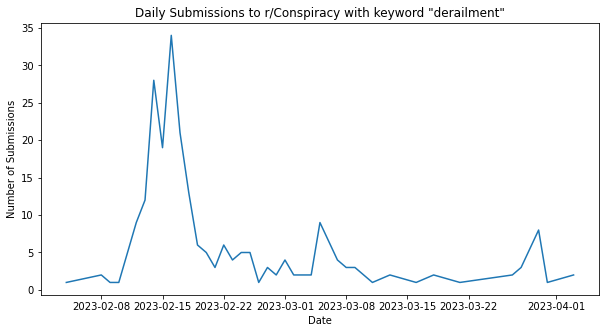

In [25]:
#set up the url 
url = 'https://api.pushshift.io/reddit/search/submission'

#set up the parameters
# collect from r/conspiracy subreddit
# collect 100 posts at a time
# collect posts from 3 February 2023 to April 2023
# retrive only data contain keywords "ohio"

params = {
    'subreddit': 'conspiracy',
    'size': 1000,
    'after': start_date,
    'q': 'derailment'
}
#pull the data
res = requests.get(url, params)
#check the status code
res.status_code

#convert the data to a json file
data = res.json()
#check the data
df = pd.DataFrame(data['data'])


# create visualization of post per day
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['created_utc'].dt.date
grouped = df.groupby('date')['id'].count()
grouped.plot(kind='line', figsize=(10,5))
plt.title(f'Daily Submissions to r/Conspiracy with keyword "derailment"')
plt.xlabel('Date')
plt.ylabel('Number of Submissions')
plt.show()
